In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_churn = pd.read_csv("Customer_Churn.csv")
customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn.drop(['customerID', 'Partner', 'Dependents','TechSupport','Contract'], axis = 1, inplace = True)

In [5]:
customer_churn.head(5)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,Yes,Electronic check,29.85,29.85,No
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,1889.5,No
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,No,No,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customer_churn.to_csv("task1.csv")

In [22]:
task2 = pd.read_csv("task1.csv")
# dropna()
task2.dropna()
task2.info()
task2.to_csv("task2.csv")
task2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   object 


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.162147,32.371149,64.761692
std,2033.283305,0.368612,24.559481,30.090047
min,0.000000,0.000000,0.000000,18.250000
25%,1760.500000,0.000000,9.000000,35.500000
50%,3521.000000,0.000000,29.000000,70.350000
75%,5281.500000,0.000000,55.000000,89.850000
max,7042.000000,1.000000,72.000000,118.750000


In [14]:
# phone service multiple lines onlinesecurity onlinebackup 
task3 = pd.read_csv("task2.csv")
task3.PhoneService.replace(('Yes','No'), (1,0), inplace = True)
task3.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
task3.OnlineSecurity.replace(('Yes','No','No internet service'), (1,0,0), inplace=True)
task3.OnlineBackup.replace(('Yes','No','No internet service'), (1,0,0), inplace=True)
task3.DeviceProtection.replace(('Yes','No','No internet service'), (1,0,0), inplace=True)
task3.StreamingTV.replace(('Yes','No','No internet service'), (1,0,0), inplace=True)
task3.StreamingMovies.replace(('Yes','No','No internet service'), (1,0,0), inplace=True)
task3.PaperlessBilling.replace(('Yes','No','No internet service'), (1,0, 0), inplace=True)
task3.MultipleLines.replace(('Yes', 'No', 'No phone service'), (1, 0, 0), inplace=True)


In [15]:
task3.to_csv("task3.csv")

In [17]:
task4 = pd.read_csv("task3.csv")
# linear regression two variables : dependent(y) independent (x) : multiplelines(x) customerchurn(y)
X = task4[['MultipleLines']] # independent variable
Y = task4[['Churn']] # dependent variable

In [21]:
# spliting x_train x_test : y_train y_test : 2:1 train (2/3) testdata(1/3)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=1/3,random_state=42)

In [29]:
#4695 2347
test_label = pd.DataFrame(y_test)
test_label.to_csv("testdata.csv")
train_data = pd.DataFrame(x_train)
train_data.head(5)

,MultipleLines
6918,0
6684,0
203,0
2855,0
3961,0


In [31]:
# training dataset and testing dataset 

regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
# y = mx + c 
print("Slope of the line (m)", regressor.coef_) # slope = positive rlshp is directly propotional
print("Gradient of the line (x)",regressor.intercept_)

Slope of the line (m) [[0.03045748]]
Gradient of the line (x) [0.25]


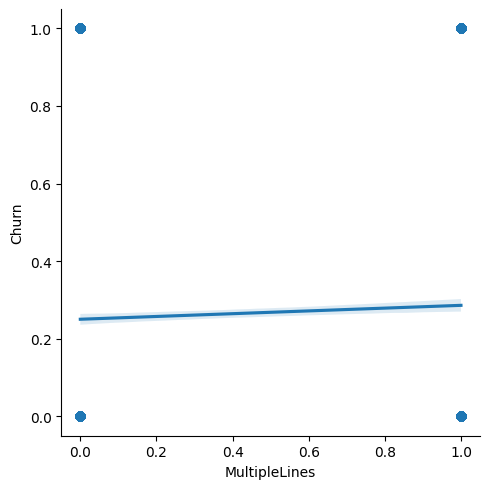

In [35]:
sns.lmplot(x = "MultipleLines" ,y = "Churn", data= task4)

In [37]:
# using test data
y_predict = regressor.predict(x_test)
y_predict

array([[0.25      ],
       [0.28045748],
       [0.25      ],
       ...,
       [0.25      ],
       [0.28045748],
       [0.28045748]])

Text(0.5, 1.0, 'Multiple lInes vs Customer Churn')

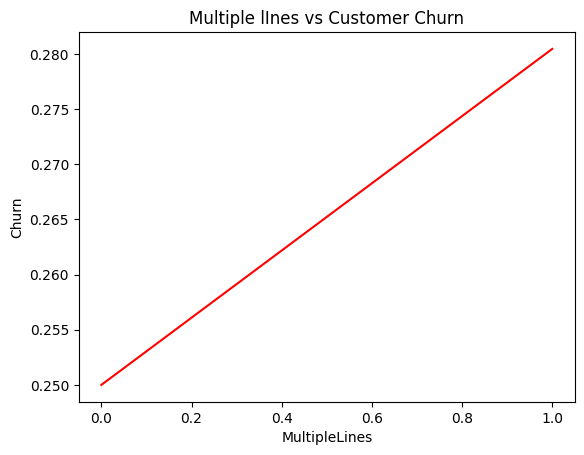

In [38]:
plt.plot(x_test, y_predict, color = 'red')
plt.ylabel("Churn")
plt.xlabel("MultipleLines")
plt.title("Multiple lInes vs Customer Churn")